In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from tqdm.auto import tqdm
# import pydeseq2

In [2]:
dir = 'sc_data'
files = os.listdir(dir)
print(files)
batch = pd.read_csv(f'{dir}/{files[0]}').set_index('index')
# protein_counts = pd.read_csv(f'{dir}/{files[1]}').set_index('index').astype('float64')
rna_counts = pd.read_csv(f'{dir}/{files[2]}').set_index('index').astype('float64')

['batch.csv', 'protein_counts.csv', 'rna_counts.csv']


## Quality Control

In [3]:
## normalize the counts
# protein_counts_normalized = protein_counts.apply(lambda x: np.log1p(x), axis=1)
rna_counts_normalized = rna_counts.apply(lambda x: np.log1p(x), axis=1)

In [ ]:
# Visualize the impact of filtering on total counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(protein_counts.sum(axis=1), bins=50, kde=True, color='blue')
plt.title('Distribution of Total Protein Counts')
plt.xlabel('Total Counts')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(protein_counts_normalized.sum(axis=1), bins=50, kde=True, color='green')
plt.title('Distribution of Normalized Protein Counts')
plt.xlabel('Total Counts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Visualize the impact of filtering on total counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(rna_counts.sum(axis=1), bins=50, kde=True, color='blue')
plt.title('Distribution of Total RNA Counts')
plt.xlabel('Total Counts')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(rna_counts_normalized, bins=50, kde=True, color='green')
plt.title('Distribution of Normalized RNA Counts')
plt.xlabel('Total Counts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/home/sanaz/miniconda3/envs/biomems/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


## Lower Dimensional Embedding

In [ ]:
pca1 = PCA()
components = pca1.fit_transform(rna_counts)
pca2 = PCA()
components = pca2.fit_transform(rna_counts_normalized)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.cumsum(pca1.explained_variance_ratio_), '-o')
plt.title('PCA variance cumsum for RNA counts')
plt.subplot(1,2,2)
plt.plot(np.cumsum(pca2.explained_variance_ratio_), '-o')
plt.title('PCA variance cumsum for Normalized RNA counts')

Text(0.5, 1.0, 'PCA variance cumsum for Normalized Protein counts')

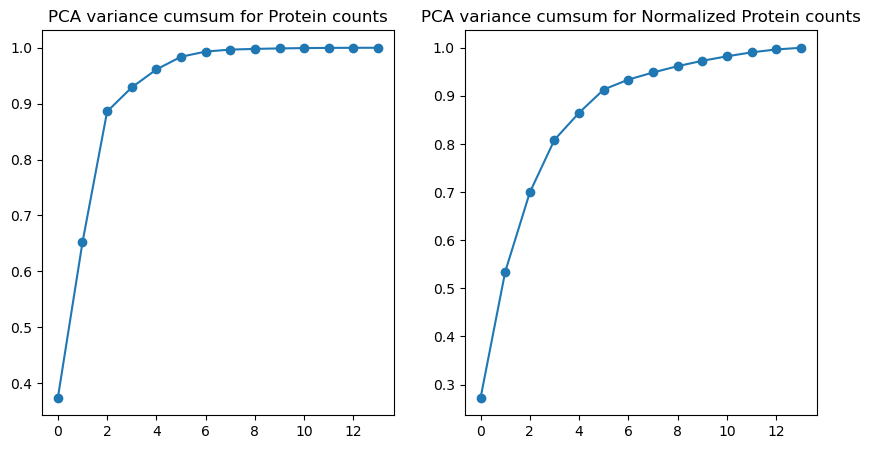

In [50]:
pca1 = PCA()
components = pca1.fit_transform(protein_counts)
pca2 = PCA()
components = pca2.fit_transform(protein_counts_normalized)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.cumsum(pca1.explained_variance_ratio_), '-o')
plt.title('PCA variance cumsum for Protein counts')
plt.subplot(1,2,2)
plt.plot(np.cumsum(pca2.explained_variance_ratio_), '-o')
plt.title('PCA variance cumsum for Normalized Protein counts')

## Constructing clusters

In [ ]:
# scaler = MinMaxScaler()
# scale = scaler.fit_transform(rna_counts_normalized)
# df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)']);

In [ ]:
wss = []
for k in tqdm(range(2,12)):
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(rna_counts_normalized)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)